# Project - The Better India Task 4
### by Abhishek verma

In [1]:
# Importing The required Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import array as arr
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer 
import string
from datetime import datetime

In [2]:
# Reading The Dataset.
df= pd.read_csv(r"D:\WORK FILES\python project the_better_india\news_syn.csv")
display(df.head())       

,Article category,News Headline,Author,news_link,short_description,date
0,WEDDINGS,Real Weddings: Couples Who Got Married This We...,NaN,_RARE_,If there's ever a time you need a little distr...,29/07/13
1,WELLNESS,The Moment I Knew,"MeiMei Fox, Contributor\nNYTimes bestselling a...",_RARE_,NaN,02/05/13
2,POLITICS,Sunday Roundup,"Arianna Huffington, Contributor",_RARE_,NaN,17/01/15
3,PARENTS,Funniest Parenting Tweets: What Moms And Dads ...,Hollis Miller,_RARE_,"Kids may say the darndest things, but parents ...",15/07/16
4,BUSINESS,WATCH: 60 Seconds of Social Media,"Shawn Amos, Contributor\nblues preacher | cont...",_RARE_,"So, you think you're a real fashionista, hmm? ...",18/08/12


In [3]:
# Checking the Shape of the Data (Number of Rows and Columns).
df.shape


(10000, 6)

In [4]:
# checking the information about data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Article category   10000 non-null  object
 1   News Headline      9087 non-null   object
 2   Author             7282 non-null   object
 3   news_link          10000 non-null  object
 4   short_description  3874 non-null   object
 5   date               10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


In [5]:
# Checking the NULL Values inside the Dataset.
df.isnull().sum()

Article category        0
News Headline         913
Author               2718
news_link               0
short_description    6126
date                    0
dtype: int64

In [6]:
df.nunique()

Article category       41
News Headline          34
Author                267
news_link               1
short_description      46
date                 1813
dtype: int64

#REPLACING CATEGORY NAME IN ARTICLE CATEGORY WITH SAME CATEGORY OR SIMILAR CATEGORY. 

In [7]:

df["Article category"] = df["Article category"].replace("WORLDPOST","THE WORLDPOST")
df["Article category"] = df["Article category"].replace(("CULTURE & ARTS","ARTS"),"ARTS & CULTURE")
df["Article category"] = df["Article category"].replace("STYLE","STYLE & BEAUTY")

# Checking unique article category

In [8]:
df['Article category'].unique()

array(['WEDDINGS', 'WELLNESS', 'POLITICS', 'PARENTS', 'BUSINESS',
       'FOOD & DRINK', 'TRAVEL', 'COMEDY', 'IMPACT', 'HOME & LIVING',
       'BLACK VOICES', 'PARENTING', 'QUEER VOICES', 'ENVIRONMENT',
       'WEIRD NEWS', 'THE WORLDPOST', 'HEALTHY LIVING', 'SPORTS',
       'ENTERTAINMENT', 'CRIME', 'COLLEGE', 'MEDIA', 'WOMEN',
       'ARTS & CULTURE', 'GOOD NEWS', 'STYLE & BEAUTY', 'DIVORCE',
       'RELIGION', 'MONEY', 'SCIENCE', 'GREEN', 'TASTE', 'WORLD NEWS',
       'TECH', 'LATINO VOICES', 'EDUCATION', 'FIFTY'], dtype=object)

#Filling column News Headline , Author and short_description by specific category in article catergory.

In [9]:

df.loc[df["Article category"]=="WELLNESS","short_description"]= df[df['Article category']=='WELLNESS']["short_description"].fillna(df[df["Article category"]=="WELLNESS"]["short_description"].mode()[0])
df.loc[df["Article category"]=="POLITICS","short_description"]= df[df['Article category']=='POLITICS']["short_description"].fillna(df[df["Article category"]=="POLITICS"]["short_description"].mode()[0])
df.loc[df["Article category"]=="PARENTS","short_description"]= df[df['Article category']=='PARENTS']["short_description"].fillna(df[df["Article category"]=="PARENTS"]["short_description"].mode()[0])
df.loc[df["Article category"]=="BUSINESS","short_description"]= df[df['Article category']=='BUSINESS']["short_description"].fillna(df[df["Article category"]=="BUSINESS"]["short_description"].mode()[0])
df.loc[df["Article category"]=="FOOD & DRINK","short_description"]= df[df['Article category']=='FOOD & DRINK']["short_description"].fillna(df[df["Article category"]=="FOOD & DRINK"]["short_description"].mode()[0])
df.loc[df["Article category"]=="TRAVEL","short_description"]= df[df['Article category']=='TRAVEL']["short_description"].fillna(df[df["Article category"]=="TRAVEL"]["short_description"].mode()[0])
df.loc[df["Article category"]=="COMEDY","short_description"]= df[df['Article category']=='COMEDY']["short_description"].fillna(df[df["Article category"]=="COMEDY"]["short_description"].mode()[0])
df.loc[df["Article category"]=="IMPACT","short_description"]= df[df['Article category']=='IMPACT']["short_description"].fillna(df[df["Article category"]=="IMPACT"]["short_description"].mode()[0])
df.loc[df["Article category"]=="HOME & LIVING","short_description"]= df[df['Article category']=='HOME & LIVING']["short_description"].fillna(df[df["Article category"]=="HOME & LIVING"]["short_description"].mode()[0])
df.loc[df["Article category"]=="BLACK VOICES","short_description"]= df[df['Article category']=='BLACK VOICES']["short_description"].fillna(df[df["Article category"]=="BLACK VOICES"]["short_description"].mode()[0])
df.loc[df["Article category"]=="PARENTING","short_description"]= df[df['Article category']=='PARENTING']["short_description"].fillna(df[df["Article category"]=="PARENTING"]["short_description"].mode()[0])
df.loc[df["Article category"]=="QUEER VOICES","short_description"]= df[df['Article category']=='QUEER VOICES']["short_description"].fillna(df[df["Article category"]=="QUEER VOICES"]["short_description"].mode()[0])
df.loc[df["Article category"]=="ENVIRONMENT","short_description"]= df[df['Article category']=='ENVIRONMENT']["short_description"].fillna(df[df["Article category"]=="ENVIRONMENT"]["short_description"].mode()[0])
df.loc[df["Article category"]=="WEIRD NEWS","short_description"]= df[df['Article category']=='WEIRD NEWS']["short_description"].fillna(df[df["Article category"]=="WEIRD NEWS"]["short_description"].mode()[0])
df.loc[df["Article category"]=="THE WORLDPOST","short_description"]= df[df['Article category']=='THE WORLDPOST']["short_description"].fillna(df[df["Article category"]=="THE WORLDPOST"]["short_description"].mode()[0])
df.loc[df["Article category"]=="HEALTHY LIVING","short_description"]= df[df['Article category']=='HEALTHY LIVING']["short_description"].fillna(df[df["Article category"]=="HEALTHY LIVING"]["short_description"].mode()[0])
df.loc[df["Article category"]=="SPORTS","short_description"]= df[df['Article category']=='SPORTS']["short_description"].fillna(df[df["Article category"]=="SPORTS"]["short_description"].mode()[0])
df.loc[df["Article category"]=="ENTERTAINMENT","short_description"]= df[df['Article category']=='ENTERTAINMENT']["short_description"].fillna(df[df["Article category"]=="ENTERTAINMENT"]["short_description"].mode()[0])
df.loc[df["Article category"]=="CRIME","short_description"]= df[df['Article category']=='CRIME']["short_description"].fillna(df[df["Article category"]=="CRIME"]["short_description"].mode()[0])
df.loc[df["Article category"]=="COLLEGE","short_description"]= df[df['Article category']=='COLLEGE']["short_description"].replace(np.nan,"no short_description")
df.loc[df["Article category"]=="MEDIA","short_description"]= df[df['Article category']=='MEDIA']["short_description"].fillna(df[df["Article category"]=="MEDIA"]["short_description"].mode()[0])
df.loc[df["Article category"]=="WOMEN","short_description"]= df[df['Article category']=='WOMEN']["short_description"].fillna(df[df["Article category"]=="WOMEN"]["short_description"].mode()[0])
df.loc[df["Article category"]=="ARTS & CULTURE","short_description"]= df[df['Article category']=='ARTS & CULTURE']["short_description"].fillna(df[df["Article category"]=="ARTS & CULTURE"]["short_description"].mode()[0])
df.loc[df['Article category']=='WELLNESS','short_description']= df[df['Article category']=='WELLNESS']['short_description'].fillna(df[df['Article category']=='WELLNESS']['short_description'].mode()[0])
df.loc[df['Article category']=='GOOD NEWS','short_description']= df[df['Article category']=='GOOD NEWS']['short_description'].fillna(df[df['Article category']=='GOOD NEWS']['short_description'].mode()[0])
df.loc[df['Article category']=='STYLE & BEAUTY','short_description']= df[df['Article category']=='STYLE & BEAUTY']['short_description'].fillna(df[df['Article category']=='STYLE & BEAUTY']['short_description'].mode()[0])
df.loc[df['Article category']=='DIVORCE','short_description']= df[df['Article category']=='DIVORCE']['short_description'].fillna(df[df['Article category']=='DIVORCE']['short_description'].mode()[0])
df.loc[df['Article category']=='RELIGION','short_description']= df[df['Article category']=='RELIGION']['short_description'].fillna(df[df['Article category']=='RELIGION']['short_description'].mode()[0])
df.loc[df['Article category']=='SCIENCE','short_description']= df[df['Article category']=='SCIENCE']['short_description'].fillna(df[df['Article category']=='SCIENCE']['short_description'].mode()[0])
df.loc[df['Article category']=='MONEY','short_description']= df[df['Article category']=='MONEY']['short_description'].fillna(df[df['Article category']=='MONEY']['short_description'].mode()[0])
df.loc[df['Article category']=='GREEN','short_description']= df[df['Article category']=='GREEN']['short_description'].fillna(df[df['Article category']=='GREEN']['short_description'].mode()[0])
df.loc[df['Article category']=='TASTE','short_description']= df[df['Article category']=='TASTE']['short_description'].fillna(df[df['Article category']=='TASTE']['short_description'].mode()[0])
df.loc[df['Article category']=='WORLD NEWS','short_description']= df[df['Article category']=='WORLD NEWS']['short_description'].replace(np.nan, 'no short_description')
df.loc[df['Article category']=='TECH','short_description']= df[df['Article category']=='TECH']['short_description'].fillna(df[df['Article category']=='TECH']['short_description'].mode()[0])
df.loc[df['Article category']=='LATINO VOICES','short_description']= df[df['Article category']=='LATINO VOICES']['short_description'].fillna(df[df['Article category']=='LATINO VOICES']['short_description'].mode()[0])
df.loc[df['Article category']=='EDUCATION','short_description']= df[df['Article category']=='EDUCATION']['short_description'].fillna(df[df['Article category']=='EDUCATION']['short_description'].mode()[0])
df.loc[df['Article category']=='FIFTY','short_description']= df[df['Article category']=='FIFTY']['short_description'].fillna(df[df['Article category']=='FIFTY']['short_description'].mode()[0])

In [10]:
df.loc[df["Article category"]=="WEDDINGS","News Headline"]= df[df['Article category']=='WEDDINGS']["News Headline"].fillna(df[df["Article category"]=="WEDDINGS"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="WELLNESS","News Headline"]= df[df['Article category']=='WELLNESS']["News Headline"].fillna(df[df["Article category"]=="WELLNESS"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="POLITICS","News Headline"]= df[df['Article category']=='POLITICS']["News Headline"].fillna(df[df["Article category"]=="POLITICS"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="PARENTS","News Headline"]= df[df['Article category']=='PARENTS']["News Headline"].fillna(df[df["Article category"]=="PARENTS"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="BUSINESS","News Headline"]= df[df['Article category']=='BUSINESS']["News Headline"].fillna(df[df["Article category"]=="BUSINESS"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="FOOD & DRINK","News Headline"]= df[df['Article category']=='FOOD & DRINK']["News Headline"].fillna(df[df["Article category"]=="FOOD & DRINK"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="TRAVEL","News Headline"]= df[df['Article category']=='TRAVEL']["News Headline"].fillna(df[df["Article category"]=="TRAVEL"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="COMEDY","News Headline"]= df[df['Article category']=='COMEDY']["News Headline"].fillna(df[df["Article category"]=="COMEDY"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="IMPACT","News Headline"]= df[df['Article category']=='IMPACT']["News Headline"].fillna(df[df["Article category"]=="IMPACT"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="HOME & LIVING","News Headline"]= df[df['Article category']=='HOME & LIVING']["News Headline"].fillna(df[df["Article category"]=="HOME & LIVING"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="BLACK VOICES","News Headline"]= df[df['Article category']=='BLACK VOICES']["News Headline"].fillna(df[df["Article category"]=="BLACK VOICES"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="PARENTING","News Headline"]= df[df['Article category']=='PARENTING']["News Headline"].fillna(df[df["Article category"]=="PARENTING"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="QUEER VOICES","News Headline"]= df[df['Article category']=='QUEER VOICES']["News Headline"].fillna(df[df["Article category"]=="QUEER VOICES"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="ENVIRONMENT","News Headline"]= df[df['Article category']=='ENVIRONMENT']["News Headline"].fillna(df[df["Article category"]=="ENVIRONMENT"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="WEIRD NEWS","News Headline"]= df[df['Article category']=='WEIRD NEWS']["News Headline"].fillna(df[df["Article category"]=="WEIRD NEWS"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="THE WORLDPOST","News Headline"]= df[df['Article category']=='THE WORLDPOST']["News Headline"].fillna(df[df["Article category"]=="THE WORLDPOST"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="HEALTHY LIVING","News Headline"]= df[df['Article category']=='HEALTHY LIVING']["News Headline"].fillna(df[df["Article category"]=="HEALTHY LIVING"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="SPORTS","News Headline"]= df[df['Article category']=='SPORTS']["News Headline"].fillna(df[df["Article category"]=="SPORTS"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="ENTERTAINMENT","News Headline"]= df[df['Article category']=='ENTERTAINMENT']["News Headline"].fillna(df[df["Article category"]=="ENTERTAINMENT"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="CRIME","News Headline"]= df[df['Article category']=='CRIME']["News Headline"].fillna(df[df["Article category"]=="CRIME"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="COLLEGE","News Headline"]= df[df['Article category']=='COLLEGE']["News Headline"].fillna(df[df['Article category']=='COLLEGE']['News Headline'].mode()[0])
df.loc[df["Article category"]=="MEDIA","News Headline"]= df[df['Article category']=='MEDIA']["News Headline"].fillna(df[df["Article category"]=="MEDIA"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="WOMEN","News Headline"]= df[df['Article category']=='WOMEN']["News Headline"].fillna(df[df["Article category"]=="WOMEN"]["News Headline"].mode()[0])
df.loc[df["Article category"]=="ARTS & CULTURE","News Headline"]= df[df['Article category']=='ARTS & CULTURE']["News Headline"].fillna(df[df["Article category"]=="ARTS & CULTURE"]["News Headline"].mode()[0])
df.loc[df['Article category']=='WELLNESS','News Headline']= df[df['Article category']=='WELLNESS']['News Headline'].fillna(df[df['Article category']=='WELLNESS']['News Headline'].mode()[0])
df.loc[df['Article category']=='GOOD NEWS','News Headline']= df[df['Article category']=='GOOD NEWS']['News Headline'].fillna(df[df['Article category']=='GOOD NEWS']['News Headline'].mode()[0])
df.loc[df['Article category']=='STYLE & BEAUTY','News Headline']= df[df['Article category']=='STYLE & BEAUTY']['News Headline'].fillna(df[df['Article category']=='STYLE & BEAUTY']['News Headline'].mode()[0])
df.loc[df['Article category']=='DIVORCE','News Headline']= df[df['Article category']=='DIVORCE']['News Headline'].fillna(df[df['Article category']=='DIVORCE']['News Headline'].mode()[0])
df.loc[df['Article category']=='RELIGION','News Headline']= df[df['Article category']=='RELIGION']['News Headline'].fillna(df[df['Article category']=='RELIGION']['News Headline'].mode()[0])
df.loc[df['Article category']=='SCIENCE','News Headline']= df[df['Article category']=='SCIENCE']['News Headline'].fillna(df[df['Article category']=='SCIENCE']['News Headline'].mode()[0])
df.loc[df['Article category']=='MONEY','News Headline']= df[df['Article category']=='MONEY']['News Headline'].fillna(df[df['Article category']=='MONEY']['News Headline'].mode()[0])
df.loc[df['Article category']=='GREEN','News Headline']= df[df['Article category']=='GREEN']['News Headline'].fillna(df[df['Article category']=='GREEN']['News Headline'].mode()[0])
df.loc[df['Article category']=='TASTE','News Headline']= df[df['Article category']=='TASTE']['News Headline'].fillna(df[df['Article category']=='TASTE']['News Headline'].mode()[0])
df.loc[df['Article category']=='WORLD NEWS','News Headline']= df[df['Article category']=='WORLD NEWS']['News Headline'].fillna(df[df['Article category']=='WORLD NEWS']['News Headline'].mode()[0])
df.loc[df['Article category']=='TECH','News Headline']= df[df['Article category']=='TECH']['News Headline'].fillna(df[df['Article category']=='TECH']['News Headline'].mode()[0])
df.loc[df['Article category']=='LATINO VOICES','News Headline']= df[df['Article category']=='LATINO VOICES']['News Headline'].fillna(df[df['Article category']=='LATINO VOICES']['News Headline'].mode()[0])
df.loc[df['Article category']=='EDUCATION','News Headline']= df[df['Article category']=='EDUCATION']['News Headline'].fillna(df[df['Article category']=='EDUCATION']['News Headline'].mode()[0])
df.loc[df['Article category']=='FIFTY','News Headline']= df[df['Article category']=='FIFTY']['News Headline'].fillna(df[df['Article category']=='FIFTY']['News Headline'].mode()[0])

In [11]:
df.loc[df["Article category"]=="WEDDINGS","Author"]= df[df['Article category']=='WEDDINGS']["Author"].replace(np.nan , "No Author ")
df.loc[df["Article category"]=="WELLNESS","Author"]= df[df['Article category']=='WELLNESS']["Author"].fillna(df[df["Article category"]=="WELLNESS"]["Author"].mode()[0])
df.loc[df["Article category"]=="POLITICS","Author"]= df[df['Article category']=='POLITICS']["Author"].fillna(df[df["Article category"]=="POLITICS"]["Author"].mode()[0])
df.loc[df["Article category"]=="PARENTS","Author"]= df[df['Article category']=='PARENTS']["Author"].fillna(df[df["Article category"]=="PARENTS"]["Author"].mode()[0])
df.loc[df["Article category"]=="BUSINESS","Author"]= df[df['Article category']=='BUSINESS']["Author"].fillna(df[df["Article category"]=="BUSINESS"]["Author"].mode()[0])
df.loc[df["Article category"]=="FOOD & DRINK","Author"]= df[df['Article category']=='FOOD & DRINK']["Author"].fillna(df[df["Article category"]=="FOOD & DRINK"]["Author"].mode()[0])
df.loc[df["Article category"]=="TRAVEL","Author"]= df[df['Article category']=='TRAVEL']["Author"].fillna(df[df["Article category"]=="TRAVEL"]["Author"].mode()[0])
df.loc[df["Article category"]=="COMEDY","Author"]= df[df['Article category']=='COMEDY']["Author"].fillna(df[df["Article category"]=="COMEDY"]["Author"].mode()[0])
df.loc[df["Article category"]=="IMPACT","Author"]= df[df['Article category']=='IMPACT']["Author"].fillna(df[df["Article category"]=="IMPACT"]["Author"].mode()[0])
df.loc[df["Article category"]=="HOME & LIVING","Author"]= df[df['Article category']=='HOME & LIVING']["Author"].fillna(df[df["Article category"]=="HOME & LIVING"]["Author"].mode()[0])
df.loc[df["Article category"]=="BLACK VOICES","Author"]= df[df['Article category']=='BLACK VOICES']["Author"].fillna(df[df["Article category"]=="BLACK VOICES"]["Author"].mode()[0])
df.loc[df["Article category"]=="PARENTING","Author"]= df[df['Article category']=='PARENTING']["Author"].fillna(df[df["Article category"]=="PARENTING"]["Author"].mode()[0])
df.loc[df["Article category"]=="QUEER VOICES","Author"]= df[df['Article category']=='QUEER VOICES']["Author"].fillna(df[df["Article category"]=="QUEER VOICES"]["Author"].mode()[0])
df.loc[df["Article category"]=="ENVIRONMENT","Author"]= df[df['Article category']=='ENVIRONMENT']["Author"].fillna(df[df["Article category"]=="ENVIRONMENT"]["Author"].mode()[0])
df.loc[df["Article category"]=="WEIRD NEWS","Author"]= df[df['Article category']=='WEIRD NEWS']["Author"].fillna(df[df["Article category"]=="WEIRD NEWS"]["Author"].mode()[0])
df.loc[df["Article category"]=="THE WORLDPOST","Author"]= df[df['Article category']=='THE WORLDPOST']["Author"].fillna(df[df["Article category"]=="THE WORLDPOST"]["Author"].mode()[0])
df.loc[df["Article category"]=="HEALTHY LIVING","Author"]= df[df['Article category']=='HEALTHY LIVING']["Author"].fillna(df[df["Article category"]=="HEALTHY LIVING"]["Author"].mode()[0])
df.loc[df["Article category"]=="SPORTS","Author"]= df[df['Article category']=='SPORTS']["Author"].fillna(df[df["Article category"]=="SPORTS"]["Author"].mode()[0])
df.loc[df["Article category"]=="ENTERTAINMENT","Author"]= df[df['Article category']=='ENTERTAINMENT']["Author"].fillna(df[df["Article category"]=="ENTERTAINMENT"]["Author"].mode()[0])
df.loc[df["Article category"]=="CRIME","Author"]= df[df['Article category']=='CRIME']["Author"].fillna(df[df["Article category"]=="CRIME"]["Author"].mode()[0])
df.loc[df["Article category"]=="COLLEGE","Author"]= df[df['Article category']=='COLLEGE']["Author"].fillna(df[df['Article category']=='COLLEGE']['Author'].mode()[0])#replace(np.nan,"no Author")
df.loc[df["Article category"]=="MEDIA","Author"]= df[df['Article category']=='MEDIA']["Author"].fillna(df[df["Article category"]=="MEDIA"]["Author"].mode()[0])
df.loc[df["Article category"]=="WOMEN","Author"]= df[df['Article category']=='WOMEN']["Author"].fillna(df[df["Article category"]=="WOMEN"]["Author"].mode()[0])
df.loc[df["Article category"]=="ARTS & CULTURE","Author"]= df[df['Article category']=='ARTS & CULTURE']["Author"].fillna(df[df["Article category"]=="ARTS & CULTURE"]["Author"].mode()[0])
df.loc[df['Article category']=='WELLNESS','Author']= df[df['Article category']=='WELLNESS']['Author'].fillna(df[df['Article category']=='WELLNESS']['Author'].mode()[0])
df.loc[df['Article category']=='GOOD NEWS','Author']= df[df['Article category']=='GOOD NEWS']['Author'].fillna(df[df['Article category']=='GOOD NEWS']['Author'].mode()[0])
df.loc[df['Article category']=='STYLE & BEAUTY','Author']= df[df['Article category']=='STYLE & BEAUTY']['Author'].fillna(df[df['Article category']=='STYLE & BEAUTY']['Author'].mode()[0])
df.loc[df['Article category']=='DIVORCE','Author']= df[df['Article category']=='DIVORCE']['Author'].fillna(df[df['Article category']=='DIVORCE']['Author'].mode()[0])
df.loc[df['Article category']=='RELIGION','Author']= df[df['Article category']=='RELIGION']['Author'].fillna(df[df['Article category']=='RELIGION']['Author'].mode()[0])
df.loc[df['Article category']=='SCIENCE','Author']= df[df['Article category']=='SCIENCE']['Author'].fillna(df[df['Article category']=='SCIENCE']['Author'].mode()[0])
df.loc[df['Article category']=='MONEY','Author']= df[df['Article category']=='MONEY']['Author'].fillna(df[df['Article category']=='MONEY']['Author'].mode()[0])
df.loc[df['Article category']=='GREEN','Author']= df[df['Article category']=='GREEN']['Author'].fillna(df[df['Article category']=='GREEN']['Author'].mode()[0])
df.loc[df['Article category']=='TASTE','Author']= df[df['Article category']=='TASTE']['Author'].fillna(df[df['Article category']=='TASTE']['Author'].mode()[0])
df.loc[df['Article category']=='WORLD NEWS','Author']= df[df['Article category']=='WORLD NEWS']['Author'].fillna(df[df['Article category']=='WORLD NEWS']['Author'].mode()[0])#replace(np.nan, 'no Author')
df.loc[df['Article category']=='TECH','Author']= df[df['Article category']=='TECH']['Author'].fillna(df[df['Article category']=='TECH']['Author'].mode()[0])
df.loc[df['Article category']=='LATINO VOICES','Author']= df[df['Article category']=='LATINO VOICES']['Author'].fillna(df[df['Article category']=='LATINO VOICES']['Author'].mode()[0])
df.loc[df['Article category']=='EDUCATION','Author']= df[df['Article category']=='EDUCATION']['Author'].fillna(df[df['Article category']=='EDUCATION']['Author'].mode()[0])
df.loc[df['Article category']=='FIFTY','Author']= df[df['Article category']=='FIFTY']['Author'].fillna(df[df['Article category']=='FIFTY']['Author'].mode()[0])

In [12]:
#df[df['Article category']=='WORLDPOST']['short_description'].isnull().sum()

In [13]:
# After fillin the null values, lets check the the null values again 
df.isnull().sum()

Article category     0
News Headline        0
Author               0
news_link            0
short_description    0
date                 0
dtype: int64

Normalizing the data 

In [14]:
print(df.dtypes)
#here date need to in datetime format 

df.date = pd.to_datetime(df.date)
print("date category no. is in datetime format")
print(df.dtypes)

Article category     object
News Headline        object
Author               object
news_link            object
short_description    object
date                 object
dtype: object
date category no. is in datetime format
Article category             object
News Headline                object
Author                       object
news_link                    object
short_description            object
date                 datetime64[ns]
dtype: object


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'number of articles (for each category)')

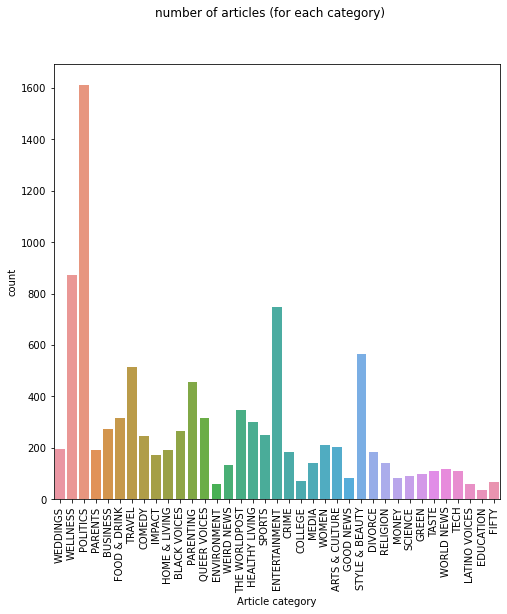

In [15]:
fig = plt.figure(figsize = (8,8))
sns.countplot(df["Article category"])
plt.xticks(rotation = 90)
fig.suptitle("number of articles (for each category)")


#From this count plot we can draw the following conclusion:
      #POLITICS and WELLNESS has seem to have most no. of articles.
      #very less articles are from the category EDUCATION.

In [16]:
#Grouping the Article category based by date. 

date_by_category = df.groupby(["date"])["Article category"].count().reset_index()  

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='number_of articles'>

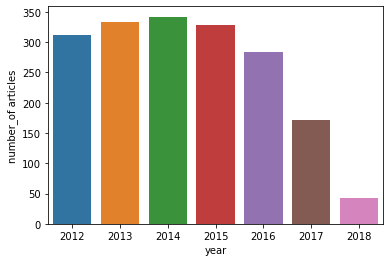

In [17]:
year = date_by_category.date.apply(lambda x: datetime.date(x).year)
articles_per_year=year.value_counts().reset_index()
articles_per_year.columns=['year','number_of articles']
sns.barplot(articles_per_year.year,articles_per_year['number_of articles'],data=articles_per_year)

#From this barplot of years we can draw the following conclusions:
# years from 2012 to 2015 had most articles 
# while 2018 had the least articles


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month_num', ylabel='number_of articles'>

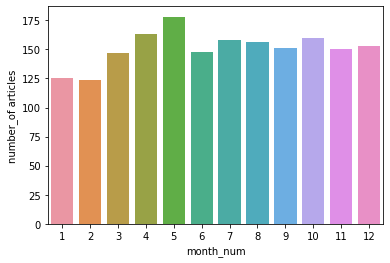

In [18]:
month= date_by_category.date.apply(lambda x: datetime.date(x).month)
articles_per_month=month.value_counts().reset_index()
articles_per_month.columns=['month_num','number_of articles']
sns.barplot(articles_per_month['month_num'],articles_per_month['number_of articles'],data=articles_per_month)

# From this barplot of months we can draw the following conclusions:
# Arpil, May, October have most no. of articles.
# January and Febuary has least no. of artilces.

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_num', ylabel='number_of_articles'>

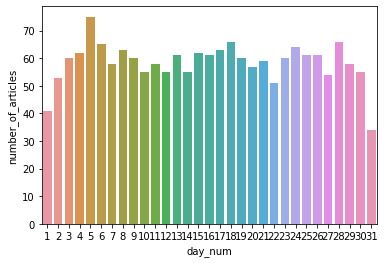

In [19]:
day = date_by_category.date.apply(lambda x : datetime.date(x).day)
articles_per_day = day.value_counts().reset_index()
articles_per_day.columns = ["day_num","number_of_articles"]
sns.barplot(articles_per_day['day_num'],articles_per_day['number_of_articles'],data = articles_per_day)


# From the barplot we can draw the following conclusions:
# 5th , 8th and 28th of every month have most no. of articles.
# while 1st and 31st of every month have least no. of articles. 

In [20]:
# Merging short_description, News Headline and Author for News length and further process.

df["text"] = df["short_description"]+ df["News Headline"] + df["Author"]


In [21]:
#Finding the length of News article 

df['News_length']= df.text.str.len() 
df['News_length']=df['News_length'].astype(int)

In [22]:
df["News_length"]

0       183
1       235
2       169
3       213
4       229
       ... 
9995    200
9996    192
9997     62
9998    178
9999    169
Name: News_length, Length: 10000, dtype: int32

#Distplot of column News_length 

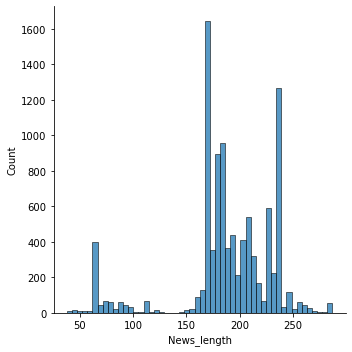

In [23]:
sns.displot(df['News_length'])


Most number of article had article length around 170 to 180 and least number of articles had news length of around 130 to 140

Normalizing The data

In [24]:
df = df.reset_index(drop = True) 

In [25]:
# Converting all the text into lowercase

df['Article category']=df['Article category'].str.lower()
df["News Headline"] = df["News Headline"].str.lower()
df['Author'] = df['Author'].str.lower()
df["news_link"] = df["news_link"].str.lower()
df["short_description"] = df["short_description"].str.lower()
df["text"] = df["text"].str.lower()

In [26]:
df.head()

,Article category,News Headline,Author,news_link,short_description,date,text,News_length
0,weddings,real weddings: couples who got married this we...,no author,_rare_,if there's ever a time you need a little distr...,2013-07-29,if there's ever a time you need a little distr...,183
1,wellness,the moment i knew,"meimei fox, contributor\nnytimes bestselling a...",_rare_,"kids may say the darndest things, but parents ...",2013-02-05,"kids may say the darndest things, but parents ...",235
2,politics,sunday roundup,"arianna huffington, contributor",_rare_,to receive the ebay roundup of vintage home fi...,2015-01-17,to receive the ebay roundup of vintage home fi...,169
3,parents,funniest parenting tweets: what moms and dads ...,hollis miller,_rare_,"kids may say the darndest things, but parents ...",2016-07-15,"kids may say the darndest things, but parents ...",213
4,business,watch: 60 seconds of social media,"shawn amos, contributor\nblues preacher | cont...",_rare_,"so, you think you're a real fashionista, hmm? ...",2012-08-18,"so, you think you're a real fashionista, hmm? ...",229


In [27]:
#splitting the author column just to clean the Author column text.

df["Author"] = df["Author"].str.split(",").str[0]

# Removing puntuation

In [28]:
 string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def punctuation_removal(messy_str):
  clean_list = [char for char in messy_str if char not in string.punctuation]
  clean_str = ''.join(clean_list)
  return clean_str
df['News Headline'] = df["News Headline"].apply(punctuation_removal)
df['Author'] = df['Author'].apply(punctuation_removal)
df['news_link'] = df['news_link'].apply(punctuation_removal)
df['Article category'] = df['Article category'].apply(punctuation_removal)
df['short_description'] = df['short_description'].apply(punctuation_removal)
df.head()


,Article category,News Headline,Author,news_link,short_description,date,text,News_length
0,weddings,real weddings couples who got married this wee...,no author,rare,if theres ever a time you need a little distra...,2013-07-29,if there's ever a time you need a little distr...,183
1,wellness,the moment i knew,meimei fox,rare,kids may say the darndest things but parents t...,2013-02-05,"kids may say the darndest things, but parents ...",235
2,politics,sunday roundup,arianna huffington,rare,to receive the ebay roundup of vintage home fi...,2015-01-17,to receive the ebay roundup of vintage home fi...,169
3,parents,funniest parenting tweets what moms and dads s...,hollis miller,rare,kids may say the darndest things but parents t...,2016-07-15,"kids may say the darndest things, but parents ...",213
4,business,watch 60 seconds of social media,shawn amos,rare,so you think youre a real fashionista hmm well...,2012-08-18,"so, you think you're a real fashionista, hmm? ...",229


In [30]:
# Downloading packages for removing stopwords 

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
# Removing stopwords 

stop = stopwords.words('english')
df['News Headline'] = df['News Headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Article category'] = df['Article category'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Author'] = df['Author'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['news_link'] = df['news_link'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['short_description'] = df['short_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,Article category,News Headline,Author,news_link,short_description,date,text,News_length
0,weddings,real weddings couples got married weekend,author,rare,theres ever time need little distraction life ...,2013-07-29,if there's ever a time you need a little distr...,183
1,wellness,moment knew,meimei fox,rare,kids may say darndest things parents tweet fun...,2013-02-05,"kids may say the darndest things, but parents ...",235
2,politics,sunday roundup,arianna huffington,rare,receive ebay roundup vintage home finds via em...,2015-01-17,to receive the ebay roundup of vintage home fi...,169
3,parents,funniest parenting tweets moms dads said twitt...,hollis miller,rare,kids may say darndest things parents tweet fun...,2016-07-15,"kids may say the darndest things, but parents ...",213
4,business,watch 60 seconds social media,shawn amos,rare,think youre real fashionista hmm well step rig...,2012-08-18,"so, you think you're a real fashionista, hmm? ...",229


# Lemmatize and Tokenizing the text

In [32]:
#Downloading the packages for lemmatize and Tokenizing the Text

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
#defining a funtion for tokenizing and lemmatizing

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return ' '.join([lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)])

df["Article category"] = df["Article category"].apply(lemmatize_text)
df["Author"] = df["Author"].apply(lemmatize_text)
df["News Headline"] = df["News Headline"].apply(lemmatize_text)
df["news_link"] = df["news_link"].apply(lemmatize_text)
df["short_description"] = df["short_description"].apply(lemmatize_text)
df.head()

,Article category,News Headline,Author,news_link,short_description,date,text,News_length
0,weddings,real weddings couple get marry weekend,author,rare,theres ever time need little distraction life ...,2013-07-29,if there's ever a time you need a little distr...,183
1,wellness,moment know,meimei fox,rare,kid may say darndest things parent tweet funni...,2013-02-05,"kids may say the darndest things, but parents ...",235
2,politics,sunday roundup,arianna huffington,rare,receive ebay roundup vintage home find via ema...,2015-01-17,to receive the ebay roundup of vintage home fi...,169
3,parent,funniest parent tweet moms dads say twitter week,hollis miller,rare,kid may say darndest things parent tweet funni...,2016-07-15,"kids may say the darndest things, but parents ...",213
4,business,watch 60 second social media,shawn amos,rare,think youre real fashionista hmm well step rig...,2012-08-18,"so, you think you're a real fashionista, hmm? ...",229


# Wordcloud

In [34]:
#importing packages for wordcloud

from wordcloud import WordCloud

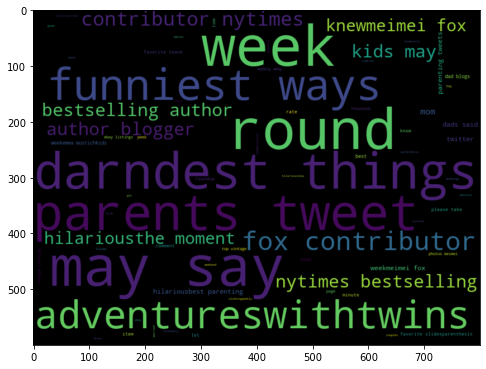

In [35]:
def wordcloud_generator(words):
    wc= WordCloud(width=800,height=600,random_state=42,max_font_size=100).generate(words)
    plt.figure(figsize=(8,8))
    plt.imshow(wc,interpolation='bilinear')
    plt.show()
    

def word_category(wellness):
    subset=df[df['Article category'] == wellness]
    texts=subset.text.values
    words= ''.join(texts)
    wordcloud_generator(words)
    
word_category('wellness') 


    #From this world cloud image we concluded that the words with bigger size are most occuring words in specific category (Wellness here..)




In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# model building imports
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.models import Sequential
from keras.regularizers import L1L2


In [37]:
# one hot encoding using keras tokenizer and pad sequencing
X = df['text']
encoder = LabelEncoder()
y = encoder.fit_transform(df['Article category'])
print("shape of input data: ", X.shape)
print("shape of target variable: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

max_features = 100000
max_len = 200

tokenizer = Tokenizer(lower = True, filters='#$%&()*+-<=>@[\\]^_`{|}~\t\n', num_words=max_features)
full_text = list(X_train.values) + list(X_test.values)
tokenizer.fit_on_texts(full_text)

# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strings into integer lists
train_padseq = pad_sequences(train_seq, maxlen=max_len) # pads the integer lists to 2D integer tensor 

# padding X_test text input data
test_seq = tokenizer.texts_to_sequences(X_test)
test_padseq = pad_sequences(test_seq, maxlen=max_len)

# word_index = tokenizer.word_index
# max_words = 150000  # total number of words to consider in embedding layer
# total_words = len(word_index)
# maxlen = 130 # max length of sequence 
y_train = to_categorical(y_train, num_classes=41)
y_test = to_categorical(y_test, num_classes=41)    

shape of input data:  (10000,)
shape of target variable:  (10000,)


### Baseline Model using Embedding and simpleRNN

In [38]:
model1 = Sequential()
model1.add(Embedding(input_dim = max_features, output_dim = 41))
model1.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model1.add(Bidirectional(SimpleRNN(128, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model1.add(SimpleRNN(64, activation='tanh'))
model1.add(Dropout(0.1))
model1.add(Dense(41, activation='softmax'))    
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 41)          4100000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        13568     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 256)        65792     
 nal)                                                            
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                20544     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 41)                2

In [40]:
model1.compile(optimizer='Adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )

history1 = model1.fit(train_padseq, y_train, 
                   batch_size=32, 
                    epochs=10, 
                    validation_split=0.2
                   )

Epoch 1/10
200/200 [==============================] - 43s 200ms/step - loss: 0.5264 - accuracy: 0.8225 - val_loss: 0.6835 - val_accuracy: 0.7912
Epoch 2/10
200/200 [==============================] - 38s 189ms/step - loss: 0.5055 - accuracy: 0.8316 - val_loss: 0.6714 - val_accuracy: 0.7950
Epoch 3/10
200/200 [==============================] - 38s 189ms/step - loss: 0.5080 - accuracy: 0.8269 - val_loss: 0.6741 - val_accuracy: 0.7944
Epoch 4/10
200/200 [==============================] - 38s 190ms/step - loss: 0.4884 - accuracy: 0.8339 - val_loss: 0.6723 - val_accuracy: 0.7944
Epoch 5/10
200/200 [==============================] - 38s 192ms/step - loss: 0.4806 - accuracy: 0.8331 - val_loss: 0.6766 - val_accuracy: 0.7950
Epoch 6/10
200/200 [==============================] - 38s 188ms/step - loss: 0.4617 - accuracy: 0.8400 - val_loss: 0.6648 - val_accuracy: 0.8069
Epoch 7/10
200/200 [==============================] - 37s 187ms/step - loss: 0.4761 - accuracy: 0.8331 - val_loss: 0.6741 - val_ac

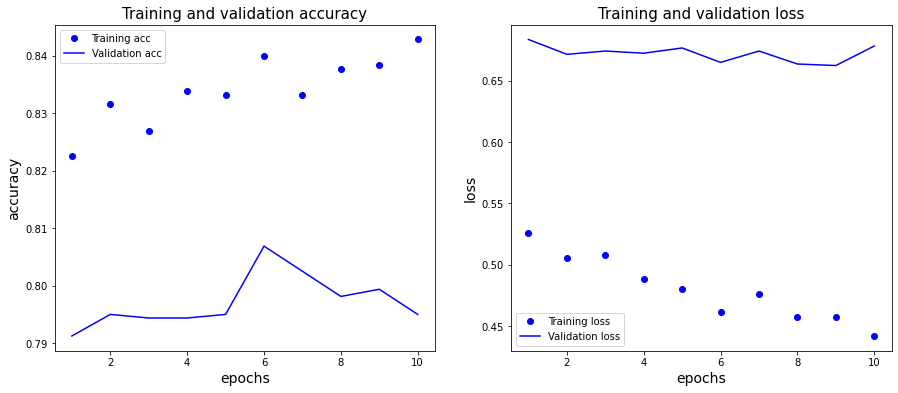

In [46]:
def plot_loss_accuracy(history):

    # create object of arrays of accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # number of epochs in our model
    epochs = range(1 ,len(acc) + 1)
    
    # call matplolib figure object and plot loss and accuracy curves
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and validation accuracy", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("accuracy", fontsize=14)
    plt.legend()
    
    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title("Training and validation loss", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("loss", fontsize=14)
    plt.legend()
    
    plt.show()
plot_loss_accuracy(history1)

### Hyperparameter Tuning 

Parameters such as output dimension, epochs and batch size are impacting the model so we have changed these parameters to see the result and accuracy

In [43]:
# basline model using embedding layers and simpleRNN
model = Sequential()
model.add(Embedding(input_dim = max_features, output_dim = 128))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(41, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         12800000  
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        24704     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, None, 128)        24704     
 nal)                                                            
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                5152      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 41)               

In [44]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
# SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

# fit model to the data
history = model.fit(train_padseq, y_train, 
                   batch_size=128, 
                    epochs=15, 
                    validation_split=0.2
                   )

# evalute the model
test_loss, test_acc = model.evaluate(test_padseq, y_test, verbose=0)
print("test loss and accuracy:", test_loss, test_acc)

Epoch 1/15
50/50 [==============================] - 47s 881ms/step - loss: 2.7476 - accuracy: 0.3714 - val_loss: 1.7636 - val_accuracy: 0.6331
Epoch 2/15
50/50 [==============================] - 44s 885ms/step - loss: 1.7455 - accuracy: 0.6019 - val_loss: 1.3391 - val_accuracy: 0.6694
Epoch 3/15
50/50 [==============================] - 44s 884ms/step - loss: 1.3521 - accuracy: 0.6698 - val_loss: 1.1232 - val_accuracy: 0.7119
Epoch 4/15
50/50 [==============================] - 47s 950ms/step - loss: 1.1356 - accuracy: 0.7045 - val_loss: 0.9912 - val_accuracy: 0.7275
Epoch 5/15
50/50 [==============================] - 47s 936ms/step - loss: 0.9754 - accuracy: 0.7414 - val_loss: 0.8881 - val_accuracy: 0.7738
Epoch 6/15
50/50 [==============================] - 45s 902ms/step - loss: 0.8714 - accuracy: 0.7645 - val_loss: 0.8278 - val_accuracy: 0.7775
Epoch 7/15
50/50 [==============================] - 46s 923ms/step - loss: 0.8058 - accuracy: 0.7702 - val_loss: 0.7770 - val_accuracy: 0.7869

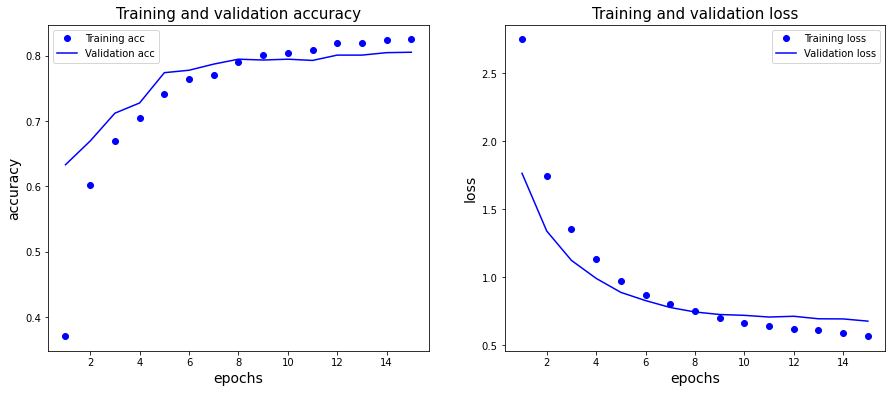

In [45]:
def plot_loss_accuracy(history):

    # create object of arrays of accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # number of epochs in our model
    epochs = range(1 ,len(acc) + 1)
    
    # call matplolib figure object and plot loss and accuracy curves
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title("Training and validation accuracy", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("accuracy", fontsize=14)
    plt.legend()
    
    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title("Training and validation loss", fontsize=15)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel("loss", fontsize=14)
    plt.legend()
    
    plt.show()
plot_loss_accuracy(history)

# Conclusion
We come to know that we have used the RNN model to train the data and found the accuracy 82.50 % and after the hyperparameter tuning we found it 82.40%. 

In [ ]:
#this is the new code for only the testing purpose
